<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-an-app-for-the-public-healt" data-toc-modified-id="Create-an-app-for-the-public-healt-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Create an app for the public healt</a></span></li><li><span><a href="#Packages-imported" data-toc-modified-id="Packages-imported-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Packages imported</a></span></li><li><span><a href="#Nutriscore-prediction" data-toc-modified-id="Nutriscore-prediction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nutriscore prediction</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Model-selection" data-toc-modified-id="Model-selection-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Model selection</a></span></li></ul></li><li><span><a href="#Model-optimization" data-toc-modified-id="Model-optimization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model optimization</a></span></li><li><span><a href="#Comparasion-to-a-baseline-PCA" data-toc-modified-id="Comparasion-to-a-baseline-PCA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparasion to a baseline PCA</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Improvements" data-toc-modified-id="Improvements-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Improvements</a></span></li></ul></div>

# Create an app for the public healt

**Objective**
Find innovative ideas of application regarding food industry.  
Project: Predict the nutriscore of a product
https://en.wikipedia.org/wiki/Nutri-score
***
Data description: https://world.openfoodfacts.org/data/data-fields.txt  
Data storage: https://world.openfoodfacts.org/data
***
Application: **Get the nutritional score for every meal/recipe** given each ingredient and quantity, so you can track your food consumption.  
*Application description*: 
The user can scan the bar code of each element, then enter the quantity of each product. 
The algorithm will calculate the proportion of each nutriment of the meal/recipe for 100g, then return the nutriscore.Based on your food consumption, we could recommand specific meal/recipe.  
The purpose of this study is to determine the nutriscore of each product based on its nutriments. This is a classification problem.
***
This notebook is dedicated to the nutriscore prediction.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-an-app-for-the-public-healt" data-toc-modified-id="Create-an-app-for-the-public-healt-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Create an app for the public healt</a></span></li><li><span><a href="#Packages-imported" data-toc-modified-id="Packages-imported-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Packages imported</a></span></li><li><span><a href="#Nutriscore-prediction" data-toc-modified-id="Nutriscore-prediction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nutriscore prediction</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Model-selection" data-toc-modified-id="Model-selection-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Model selection</a></span></li></ul></li><li><span><a href="#Model-optimization" data-toc-modified-id="Model-optimization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model optimization</a></span></li><li><span><a href="#Comparasion-to-a-baseline-PCA" data-toc-modified-id="Comparasion-to-a-baseline-PCA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparasion to a baseline PCA</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Improvements" data-toc-modified-id="Improvements-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Improvements</a></span></li></ul></div>

# Packages imported

In [2]:
#Data manipulation
import pandas as pd
import numpy as np

#Graphical
import matplotlib.pyplot as plt
import seaborn as sns

#Classification & scoring
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn import model_selection, preprocessing, neighbors, metrics, svm
from sklearn.linear_model import LogisticRegression

#Others
from collections import Counter

import gc

In [4]:
#Import the cleaned data_set from the data exploratory
df = pd.read_csv("cleaned_dataframe.csv")

# Nutriscore prediction

## Preprocessing

In [3]:
#Size of product where Nutriscore can be calculated
usable_product = df.drop(columns=['nutriscore_grade']).dropna(thresh=3).index.size
print(f"{usable_product} nutriscores can be calculated, {usable_product/df.index.size*100:.2f}% of total product")
print(f"{df.dropna().index.size} training data available")
del(usable_product)

888549 nutriscores can be calculated, 79.24% of total product
314042 training data available


In [4]:
data_set = df.dropna()
# print(data_set.columns)
X = data_set.iloc[:,1:]
y = data_set.iloc[:,0]

print(f"Size of the dataset: {y.size}")
print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

Size of the dataset: 314042
X shape: (314042, 7)
Y shape: (314042,)


X train shape: (219829, 7)


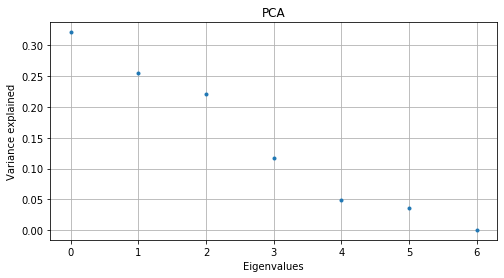

In [5]:
from sklearn import decomposition

#Split value
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, stratify = y)
print(f"X train shape: {X_train.shape}")

std_scale = preprocessing.StandardScaler()
X_train_std = std_scale.fit_transform(X_train)
X_test_std = std_scale.transform(X_test)

pca = decomposition.PCA(svd_solver='auto')
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_std))
X_test_pca = pd.DataFrame(pca.transform(X_test_std))

# Eigenvalues of covariance matrix (X_train) sorted desc:
eig_values = pd.DataFrame(pca.explained_variance_ratio_)

# plot eigenvalues
plt.figure(figsize=(8,4))
plt.grid()
plt.plot(eig_values.abs().values,'.')
plt.xticks(np.arange(X_train.shape[1]))
# plt.vlines(x=27.5, ymin=0, ymax=0.2, colors='r', linestyles='--')
plt.title('PCA')
plt.ylabel('Variance explained')
plt.xlabel('Eigenvalues')
plt.show()

In [6]:
# Dimension's reduction:
pca = decomposition.PCA(svd_solver='auto', n_components=6)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_std))
X_test_pca = pd.DataFrame(pca.transform(X_test_std))
print(f'ACP reduction: X_train_pca : {X_train_pca.shape}')

ACP reduction: X_train_pca : (219829, 6)


## Model selection

We will predict the nutriscore based on the following algorithms: logistic regression, SVM (OvR, OvO) and KNeighbors classifier. Also this are not the algorithms with the better performance compare to Random forest of XGBoost, they were the only one I learned when working on this project, since it was an initiation to ML algorithm.  

In [7]:
#Reduce the number of element to reduce the computing time
number_study = 15000
X_train_pca = X_train_pca.iloc[:number_study,:]
X_test_pca = X_test_pca.iloc[:number_study,:]
y_train = y_train.iloc[:number_study]
y_test = y_test.iloc[:number_study]

from sklearn.multiclass import OneVsRestClassifier

classifiers_1 = []
classifiers_1.append(LogisticRegression(solver='lbfgs',multi_class='ovr'))
classifiers_1.append(OneVsRestClassifier(svm.SVC(gamma='auto')))
classifiers_1.append(svm.SVC(decision_function_shape='ovr',gamma='auto'))
# classifiers_1.append(svm.SVC(decision_function_shape='ovr'))
classifiers_1.append(neighbors.KNeighborsClassifier(n_neighbors=5))

cv_results_1 = []
for classifier in classifiers_1 :
    cv_results_1.append(model_selection.cross_val_score(classifier, X_train_pca, y = y_train, scoring = "accuracy", cv = 5))

cv_means_1 = []
cv_std_1 = []
for cv_result in cv_results_1:
    cv_means_1.append(cv_result.mean())
    cv_std_1.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means_1,"CrossValerrors": cv_std_1,"Algorithm":["LogisticRegression","OvR - SCV","SVM OvR","5Neighbors"]})

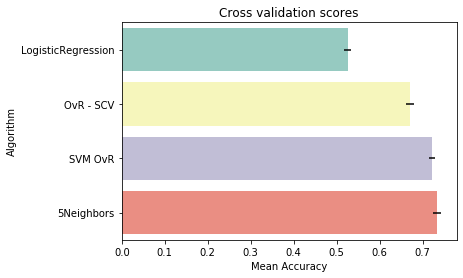

In [8]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std_1})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

# print(f"Logistic error: {cv_means_1[0]*100:.2f}%")
# print(f"OVR SVC erros: {cv_means_1[1]*100:.2f}%")
# print(f"SVM OVr erros: {cv_means_1[2]*100:.2f}%")
# print(f"Kneighbors erros: {cv_means_1[3]*100:.2f}%")

In [9]:
y_pred = []
for i,clf in enumerate(classifiers_1):
    clf.fit(X_train_pca,y_train)
    y_pred.append(clf.predict(X_test_pca))
#     print(metrics.classification_report(y_test, y_pred[i]))

In [10]:
# https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.tight_layout()

As we can see, the algorithm give a good knowledge of the food quality and is not to far off, ie predict a 5 score instead of 1.

Normalized confusion matrix
[[0.62112089 0.21074572 0.07827698 0.00231589 0.08754053]
 [0.15849595 0.56734888 0.22132318 0.01380295 0.03902903]
 [0.01146931 0.08555487 0.66398016 0.17885927 0.06013639]
 [0.00291219 0.02105735 0.09139785 0.81003584 0.07459677]
 [0.00360656 0.00655738 0.01737705 0.13442623 0.83803279]]


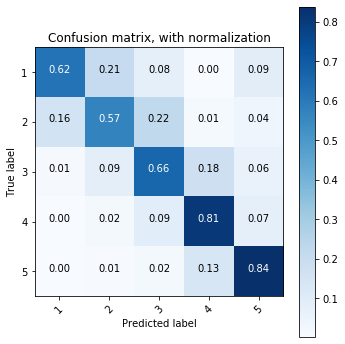

In [11]:
cm = metrics.confusion_matrix(y_test, y_pred[2])

# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, classes=[1, 2,3,4,5], title='Confusion matrix, with normalization')

# Model optimization

In [12]:
# kfold = 5
# param = []
# param.append({'C': np.logspace(-3, 3, 10), 'penalty':['l2'] })
# param.append({'gamma' : np.logspace(-3, 1, 4),'C': np.logspace(-3, 3, 5)})
# param.append({'n_neighbors':[3, 5, 7, 9, 11, 13, 15]})

# classifiers = []
# classifiers.append(LogisticRegression(solver='lbfgs',multi_class='ovr'))
# classifiers.append(svm.SVC(decision_function_shape='ovo'))
# classifiers.append(neighbors.KNeighborsClassifier())

# classifiers[0] = model_selection.GridSearchCV(classifiers[0],param[0],cv=kfold,scoring='accuracy')
# classifiers[1] = model_selection.GridSearchCV(classifiers[1],param[1],cv=kfold,scoring='accuracy',refit=True)
# classifiers[2] = model_selection.GridSearchCV(classifiers[2],param[2],cv=kfold,scoring='accuracy')

# classifiers[0].fit(X_train_pca, y_train)
# classifiers[1].fit(X_train_pca, y_train)
# classifiers[2].fit(X_train_pca, y_train)

Results  
{'C': 100.0, 'penalty': 'l2'} 0.50  
{'C': 31.622776601683793, 'gamma': 0.46415888336127775} 0.75  
{'n_neighbors': 5} 0.71  

In [13]:
classifiers = []
classifiers.append(LogisticRegression(solver='lbfgs',multi_class='ovr',C= 0.021))
classifiers.append(svm.SVC(decision_function_shape='ovo',C=31.623,gamma=0.464))
classifiers.append(neighbors.KNeighborsClassifier(n_neighbors=5))

classifiers[0].fit(X_train_pca, y_train)
classifiers[1].fit(X_train_pca, y_train)
classifiers[2].fit(X_train_pca, y_train)

cv_results = []
for classifier in classifiers :
    cv_results.append(model_selection.cross_val_score(classifier, X_train_pca, y = y_train, scoring = "accuracy", cv = 5))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","SVM OvR","5Neighbors"]})

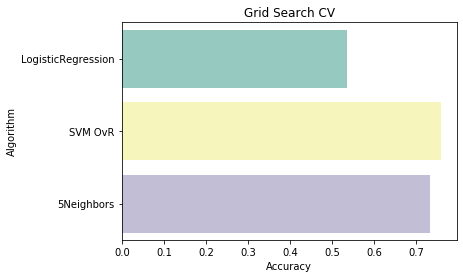

In [14]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h")
g.set_xlabel("Accuracy")
g = g.set_title("Grid Search CV")

Normalized confusion matrix
[[0.72718851 0.16905975 0.05002316 0.00833719 0.04539138]
 [0.16039981 0.61494526 0.17420276 0.02522608 0.02522608]
 [0.0350279  0.08896466 0.66305022 0.16088035 0.05207688]
 [0.00515233 0.00582437 0.07706093 0.84408602 0.06787634]
 [0.01311475 0.00885246 0.01606557 0.09934426 0.86262295]]


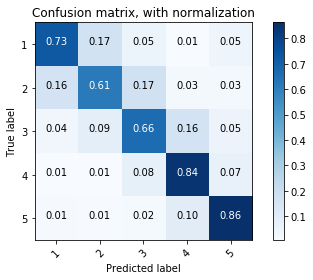

In [15]:
y_pred1 = []
for i,clf in enumerate(classifiers):
    y_pred1.append(clf.predict(X_test_pca))
#     print(metrics.classification_report(y_test, y_pred1[i]))

cm1 = metrics.confusion_matrix(y_test, y_pred1[1], labels=[1,2,3,4,5])
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm1, classes=[1,2,3,4,5],
                      title='Confusion matrix, with normalization')

# Comparasion to a baseline PCA

I wanted to compare the result obtains from the features analysis to a baseline, where all features would be considered. Then reduce the number of features with a PCA.

In [16]:
data = pd.read_csv("food.csv", sep='\t')

C:\Users\jules\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
#Features selected
features = ['nutriscore_grade', 'fat_100g', 'saturated-fat_100g', 
            'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 
            'salt_100g', 'sodium_100g']

na = data.isna().sum()*100/data.index.size
data_set = df.copy()
#Create a new dataset with all the columns from the original dataset
columns = data.columns
index = (na<99)
#Get numerical data with at least 1% data available
num = [i for i in columns[index] if data[i].dtypes =='float64' or data[i].dtypes =='int64']
tmp = [i for i in num if i not in features]

data_set[tmp] = data[tmp]
# print(data_set[tmp].count())
#Remove overall outliers 
data_set[tmp] = data_set[tmp].applymap(lambda x: 900 if x>100 else (0 if x<0 else x))
#Remove nutriscore, nutriscore_fr and nutriscore_en
data_set[tmp] = data_set[tmp].fillna(data_set[tmp].median())
data_set.drop(['nutriscore_score','nutrition-score-fr_100g','nutrition-score-uk_100g'],axis="columns" ,inplace=True)
data_set.dropna(inplace=True)

In [18]:
# df1 = df.dropna(subset=['nutriscore_grade'])
# print(data_set.columns)
X = data_set.iloc[:,1:]
y = data_set.iloc[:,0]

print(f"Size of the dataset: {y.size}")
print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

Size of the dataset: 314042
X shape: (314042, 31)
Y shape: (314042,)


X train shape: (219829, 31)


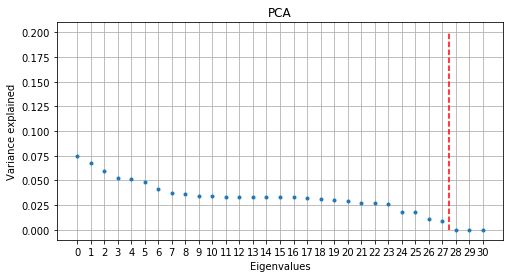

In [19]:
from sklearn import decomposition

#Split value
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, stratify = y)
print(f"X train shape: {X_train.shape}")

std_scale = preprocessing.StandardScaler()
X_train_std = std_scale.fit_transform(X_train)
X_test_std = std_scale.transform(X_test)

pca = decomposition.PCA(svd_solver='auto')
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_std))
X_test_pca = pd.DataFrame(pca.transform(X_test_std))

# Eigenvalues of covariance matrix (X_train) sorted desc:
eig_values = pd.DataFrame(pca.explained_variance_ratio_)

# plot eigenvalues
plt.figure(figsize=(8,4))
plt.grid()
plt.plot(eig_values.abs().values,'.')
plt.xticks(np.arange(X_train.shape[1]))
plt.vlines(x=27.5, ymin=0, ymax=0.2, colors='r', linestyles='--')
plt.title('PCA')
plt.ylabel('Variance explained')
plt.xlabel('Eigenvalues')
plt.show()

In [20]:
# Dimension's reduction:
pca = decomposition.PCA(svd_solver='auto', n_components=13)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_std))
X_test_pca = pd.DataFrame(pca.transform(X_test_std))
print(f'ACP reduction: X_train_pca : {X_train_pca.shape}')

ACP reduction: X_train_pca : (219829, 13)


In [21]:
number_study = 15000
X_train_pca = X_train_pca.iloc[:number_study,:]
X_test_pca = X_test_pca.iloc[:number_study,:]
y_train = y_train.iloc[:number_study]
y_test = y_test.iloc[:number_study]

classifiers_1 = []
classifiers_1.append(LogisticRegression(solver='lbfgs',multi_class='ovr'))
classifiers_1.append(OneVsRestClassifier(svm.SVC(gamma='auto')))
classifiers_1.append(svm.SVC(decision_function_shape='ovr',gamma='auto'))
# classifiers_1.append(svm.SVC(decision_function_shape='ovr'))
classifiers_1.append(neighbors.KNeighborsClassifier(n_neighbors=5))

cv_results_1 = []
for classifier in classifiers_1 :
    cv_results_1.append(model_selection.cross_val_score(classifier, X_train_pca, y = y_train, scoring = "accuracy", cv = 5))

cv_means_1 = []
cv_std_1 = []
for cv_result in cv_results_1:
    cv_means_1.append(cv_result.mean())
    cv_std_1.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means_1,"CrossValerrors": cv_std_1,"Algorithm":["LogisticRegression","OvR - SCV","SVM OvR","5Neighbors"]})

C:\Users\jules\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


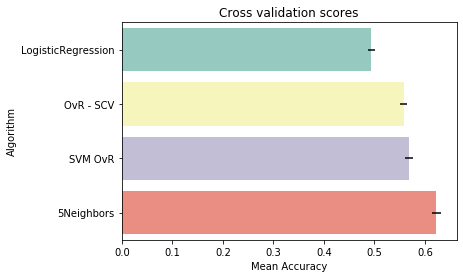

In [22]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std_1})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

Normalized confusion matrix
[[0.58247423 0.09746954 0.28819119 0.03186504 0.        ]
 [0.48034516 0.14046021 0.32214765 0.05704698 0.        ]
 [0.18726937 0.04704797 0.51599016 0.2395449  0.0101476 ]
 [0.04588364 0.00351262 0.12447859 0.78221734 0.04390779]
 [0.12613522 0.00807265 0.00975446 0.2781702  0.57786747]]


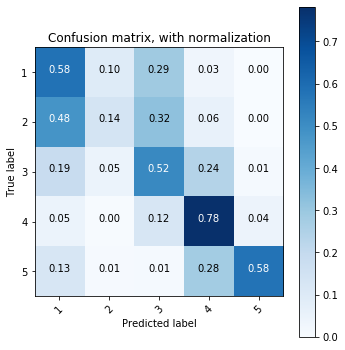

In [23]:
y_pred = []
for i,clf in enumerate(classifiers_1):
    clf.fit(X_train_pca,y_train)
    y_pred.append(clf.predict(X_test_pca))
#     print(metrics.classification_report(y_test, y_pred[i]))

cm = metrics.confusion_matrix(y_test, y_pred[2])

# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, classes=[1,2,3,4,5], title='Confusion matrix, with normalization')

**Optimization**

In [24]:
# par = {'gamma' : np.logspace(-3, 3, 4),'C': np.logspace(-3, 3, 4)}
# clf = svm.SVC(decision_function_shape='ovr',gamma='auto')
# clf = model_selection.GridSearchCV(clf,par,cv=5,scoring='accuracy',refit=True)
# clf.fit(X_train_pca,y_train)
# y_pred = clf.predict(X_test_pca)
# cm = metrics.confusion_matrix(y_test, y_pred)

# # Plot normalized confusion matrix
# plt.figure(figsize=(5,5))
# plot_confusion_matrix(cm, classes=[1,2,3,4,5], title='Confusion matrix, with normalization')

# Conclusion

With the available data, it is possible to determine the nutriscore for about 80% of all products, with a prediction that gives a good tendancy to your food consumption. Once the app get an nutrition scores for a meal/recipe, the objective would be to gather this data in order to recommand recipe/meal based on your comsumption and desire.

# Improvements

- Using K-means to fill missing values
- Using differents ML algorithms to determine the nutriscore.
- Ensembling method in order to improve the prediction.